In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import LabelEncoder


from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score


from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:




re = pd.read_csv('C:/Users/neddy/Desktop/스파르타 코딩클럽/프로젝트/심화 프로젝트/머신러닝/최종집 선정용/머신러닝최종.csv')
#머신러닝최종 데이터 설명 : 동대문구, 중랑구, 광진구, 강동구 법정동별 부동산 전월세 데이터+인구데이터
#세부 내용 : 서울시열린데이터광장 전월세 데이터 + 열린데이터광장 등록인구 데이터 + 상주인구 데이터 + 직장인구 데이터 + 직접 지도보면서 작업한 법정동별 지하철데이터 및 쇼핑몰/백화점/대형마트 데이터
#기간 : 2022년 1분기~ 2023년 3분기(2분기 제외 - 상주인구 및 직장인구 데이터 일부 구할수 없음, 23년 4분기부터 상주인구 및 직장인구 데이터 아직 집계 안 됨)
#전처리 및 합친 방법 : 부동산 데이터의 경우 법정동기준으로, 그 외 데이터들은 행정동 기준으로 되어있기에 그 외의 데이터들을 지도보면서 전부 법정동으로 맞춰준 다음 기간 및 법정동 기준으로 SQL에서 JOIN

#연식 없는 것들 제외 : 연식이 없는 것이 전체의 5~10%정도 됐던 것으로 기억하는데, 실제 거래할 때 연식을 모르는 경우는 없겠죠?
re = re.dropna(subset=['연식'])   

st_sc1 = StandardScaler()
st_sc2 = StandardScaler()

le = LabelEncoder()

mm_sc1 = MinMaxScaler()
mm_sc2 = MinMaxScaler()
mm_sc3 = MinMaxScaler()
mm_sc4 = MinMaxScaler()
mm_sc5 = MinMaxScaler()
mm_sc6 = MinMaxScaler()
mm_sc7 = MinMaxScaler()
mm_sc8 = MinMaxScaler()

re['size_sc'] = st_sc1.fit_transform(re[['size']])
re['소득_sc'] = st_sc2.fit_transform(re[['평균소득']])

#원핫인코딩이 더 맞는 방법이겠지만 상관관계까지 같이 보기엔 더 편하지 않을까 싶어서..ㅎ
re['le건물'] = le.fit_transform(re[['building']])

re['mm여성비중'] = mm_sc1.fit_transform(re[['여성인구비중']])
re['mm청년비중'] = mm_sc2.fit_transform(re[['청년인구비중']])
re['mm청년중여성비중'] = mm_sc3.fit_transform(re[['청년중여성비중']])
re['mm전체중청년여성비중'] = mm_sc4.fit_transform(re[['전체중청년여성비중']])

#좋은 방법인진 모르겠으나 큰 이상치가 없으므로 일단은 mm으로
re['mm직장인구밀도'] = mm_sc5.fit_transform(re[['직장인구밀도']]) 
re['mm2030상주인구비중'] = mm_sc6.fit_transform(re[['2030상주인구비중']])



 #데이터를 월세랑 전세로 나누기(원래는 위의 데이터 전처리를 월세랑 전세 나눈 다음에 따로 각각해줫었는데, 나누기 전에 한 번에 해도 결과값에 큰 차이가 없어서 한 번에 하는 걸로 바꿨습니다.)
re_month = re.query('type == "월세"').reset_index()      
re_whole = re.query('type == "전세"').reset_index()

#머신러닝 심화 강의 내용 ctrl+c ctrl+v(임정튜터님 감사합니다:-))
def get_score(model_name, y_true, y_pred):
  acc = accuracy_score(y_true, y_pred).round(3)
  f1 = f1_score(y_true, y_pred, average = 'macro').round(3)
  print(model_name, 'acc 스코어는: ', acc, 'f1_score(macro)는 :', f1)

c:\Users\neddy\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [4]:
#월세(#보증금 포함) : 랜덤포레스트(KNN 및 부스팅으로는 결과 안 좋았음)


re_month_f = re_month[['분기', 'add1', 'add2', 'type', 'deposit', 'rent', 'name', 'le건물', 'size_sc', '전분기대비인구증감률', 'mm여성비중', 'mm청년비중',	'mm청년중여성비중',	'mm전체중청년여성비중', '연식',	'mm직장인구밀도',	'소득_sc',	'mm2030상주인구비중', '지하철점수', '복합문화공간']]
X_features = ['deposit', 'le건물', 'size_sc', '연식', '전분기대비인구증감률', 'mm여성비중', 'mm청년비중', 'mm청년중여성비중',	'mm전체중청년여성비중',	'mm직장인구밀도',	'소득_sc',	'mm2030상주인구비중', '지하철점수', '복합문화공간']
X = re_month_f[X_features]
y = re_month_f['rent']

model_rf = RandomForestClassifier(random_state = 42)
model_rf.fit(X, y)
y_rf_pred = model_rf.predict(X)
get_score('rf', y, y_rf_pred)

rf acc 스코어는:  0.94 f1_score(macro)는 : 0.898


In [5]:
#선형회귀 모델 실험

model_lr = LinearRegression() 

model_lr.fit(X, y)


ml_pred = model_lr.predict(X)
ml_true = re_month_f['rent']

print(mean_squared_error(ml_true, ml_pred))
print(r2_score(ml_true, ml_pred))

405.2199566161665
0.339922173789578


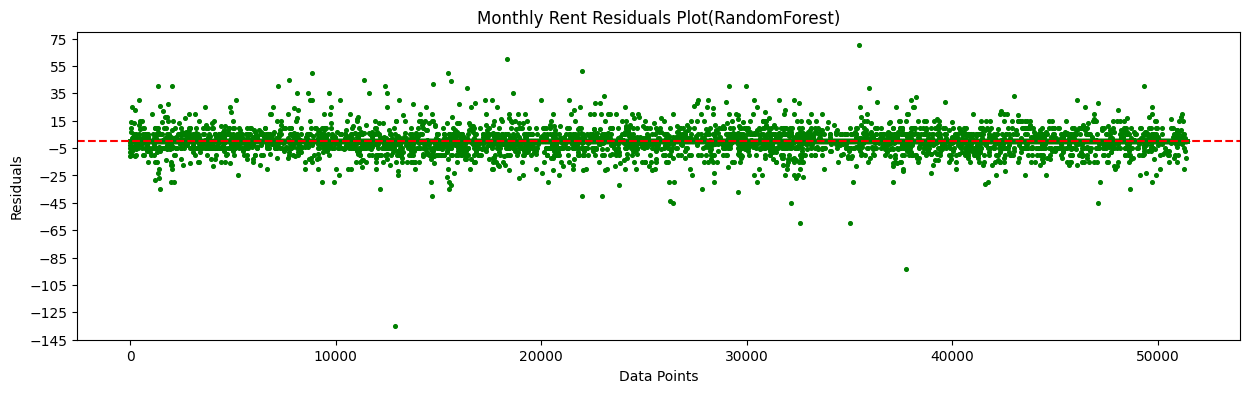

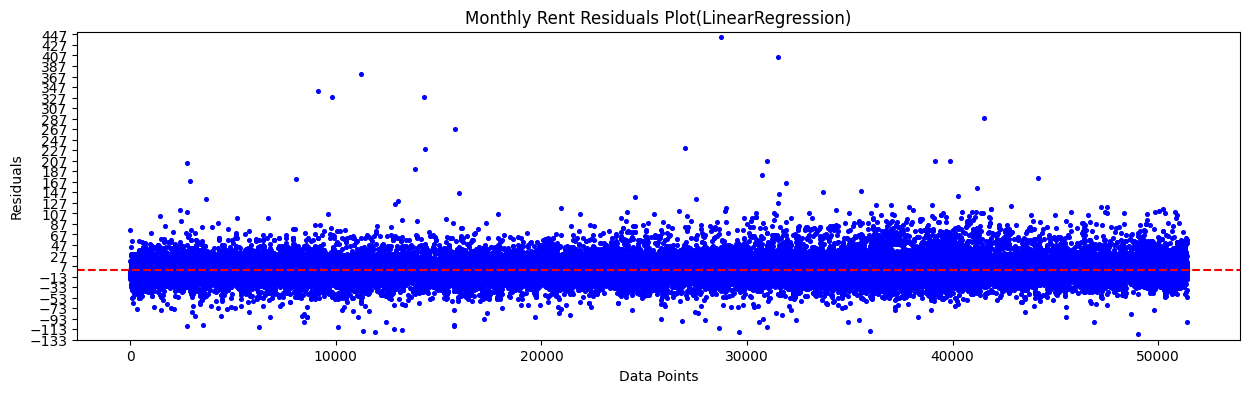

In [6]:
#랜덤포레스트와 선형회귀 잔차 비교
#시각화 어떻게 해야할지 막막했는데 chatgpt가 알려줬습니다

# 랜덤포레스트 잔차 그래프
residuals = y - y_rf_pred
plt.figure(figsize=(15, 4))
plt.scatter(range(len(residuals)), residuals, color='green', s=7)
plt.axhline(y=0, color='red', linestyle='--')
plt.ylim(min(residuals) - 10, max(residuals) + 10)  # y 축 범위 조정
plt.yticks(np.arange(min(residuals) - 10, max(residuals) + 10, 20))  # y 축 틱 추가
plt.xlabel('Data Points')
plt.ylabel('Residuals')
plt.title('Monthly Rent Residuals Plot(RandomForest)')
plt.show()


#선형회귀 잔차 그래프
lrresiduals = ml_true - ml_pred
plt.figure(figsize=(15, 4))
plt.scatter(range(len(lrresiduals)), lrresiduals, color='blue', s=7)
plt.axhline(y=0, color='red', linestyle='--')
plt.ylim(min(lrresiduals) - 10, max(lrresiduals) + 10)  # y 축 범위 조정
plt.yticks(np.arange(min(lrresiduals) - 10, max(lrresiduals) + 10, 20))  # y 축 틱 추가
plt.xlabel('Data Points')
plt.ylabel('Residuals')
plt.title('Monthly Rent Residuals Plot(LinearRegression)')
plt.show()

#랜포#성공적

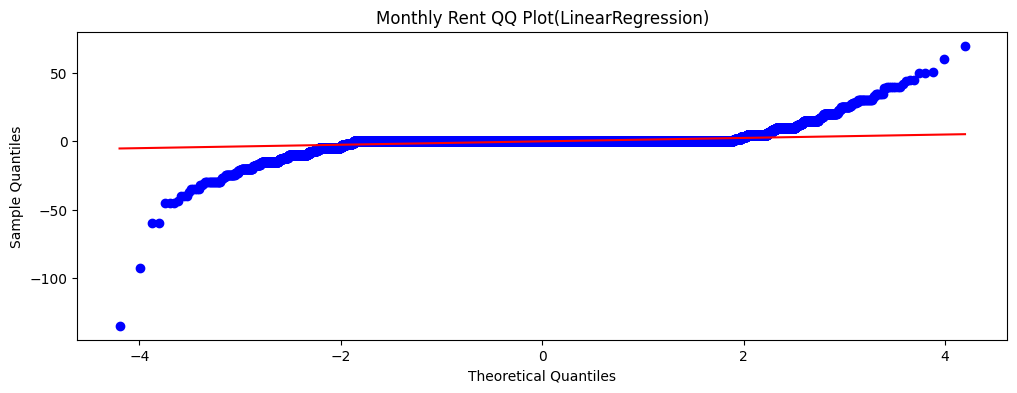

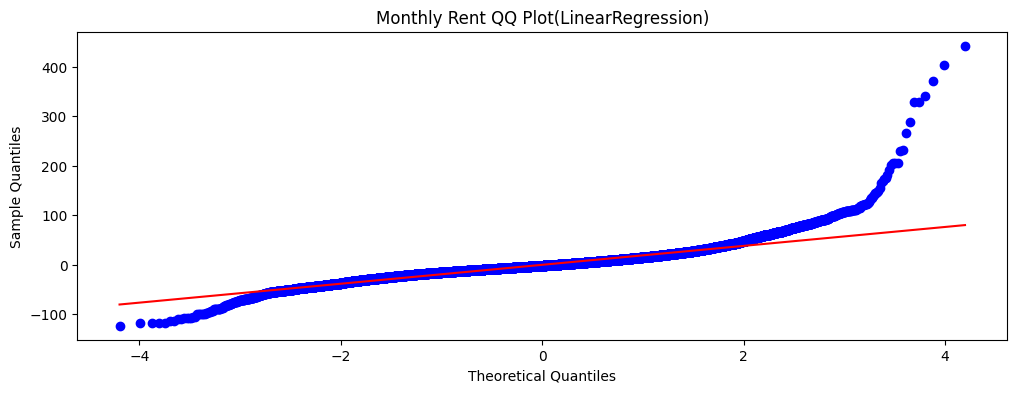

In [7]:
# probplot 함수를 사용하여 qqplot 그리기
from scipy import stats
import matplotlib.pyplot as plt

#랜덤포레스트
plt.figure(figsize=(12, 4))  # qqplot의 크기 조정
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Monthly Rent QQ Plot(LinearRegression)')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.show()

#선형회귀
plt.figure(figsize=(12, 4))  # qqplot의 크기 조정
stats.probplot(lrresiduals, dist="norm", plot=plt)
plt.title('Monthly Rent QQ Plot(LinearRegression)')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.show()

#QQplot을 구글링하다가 알게된 것이라 저도 정확하게 뭔지 모르지만, 빨간색 선에 파란 점들이 가까울 수록 좋은 모델이라는 의미라네요
#얼핏 보시면 선형회귀 결과가 나쁘지 않네라고 생각하실 수 있지만, y축 값부터가 다릅니다.

월세 각 변수별 중요도 : rent 행만 볼것!(분기 제외)


In [30]:
#왜인지는 모르지만 구글 코랩에서만 실행 가능

re_month_f.corr()

ValueError: could not convert string to float: '광진구'

전세 머신러닝

In [9]:
#전세

re_whole_f = re_whole[['분기', 'add1', 'add2', 'type', 'deposit', 'rent', 'le건물', 'name', 'size_sc', '전분기대비인구증감률',	'mm여성비중', 'mm청년비중',	'mm청년중여성비중',	'mm전체중청년여성비중', '연식',	'mm직장인구밀도',	'소득_sc',	'mm2030상주인구비중', '지하철점수', '복합문화공간']]
#re_whole_ff = re_whole_f.query('deposit <=75000') 해봤자 f1만 0.005점 높아짐

wX_features = ['le건물', 'size_sc', '연식', '전분기대비인구증감률', 'mm여성비중', 'mm청년비중', 'mm청년중여성비중',	'mm전체중청년여성비중',	'mm직장인구밀도',	'소득_sc',	'mm2030상주인구비중', '지하철점수', '복합문화공간']
wX = re_whole_f[wX_features]
wy = re_whole_f['deposit']


model_dtw = DecisionTreeClassifier(random_state = 42, max_depth = 70)
model_dtw.fit(wX, wy)
y_dtw_pred = model_dtw.predict(wX)

get_score('dt', wy, y_dtw_pred)


#랜덤포레스트를 하면 'MemoryError: could not allocate 598736896 bytes'라고 에러가 뜨네요.ㅠㅠ

dt acc 스코어는:  0.887 f1_score(macro)는 : 0.804


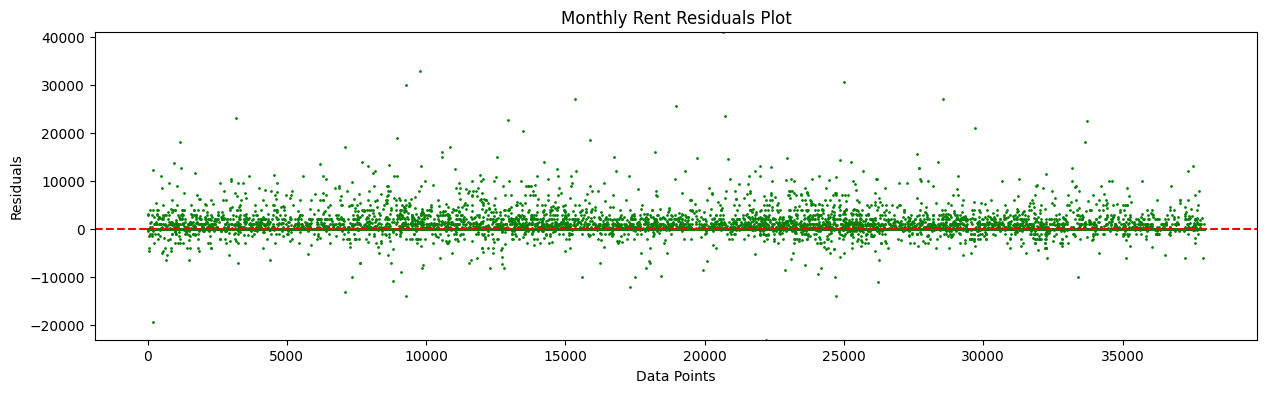

In [10]:
wresiduals = wy - y_dtw_pred

#전세 잔차의 산점도 그리기
plt.figure(figsize=(15, 4))
plt.scatter(range(len(wresiduals)), wresiduals, color='green', s=1)
plt.axhline(y=0, color='red', linestyle='--')
plt.ylim(min(wresiduals) - 10, max(wresiduals) + 10)  # y 축 범위 조정
#plt.yticks(np.arange(min(wresiduals) - 10, max(wresiduals) + 10))  # y 축 틱 추가
plt.xlabel('Data Points')
plt.ylabel('Residuals')
plt.title('Monthly Rent Residuals Plot')
plt.show()

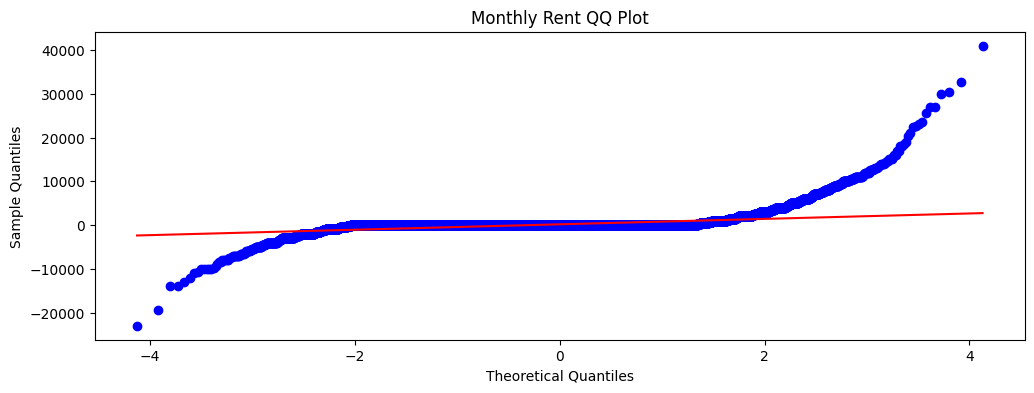

In [11]:
#전세 qqplot 그리기
from scipy import stats
import matplotlib.pyplot as plt

# probplot 함수를 사용하여 qqplot 그리기
plt.figure(figsize=(12, 4))  # qqplot의 크기 조정
stats.probplot(wresiduals, dist="norm", plot=plt)
plt.title('Monthly Rent QQ Plot')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.show()

#전세 각 변수별 중요도 : deposit행만 볼것!(분기, rent는 제외)

In [ ]:
re_whole_f.corr()

<ipython-input-47-6ef724dd334a>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  re_whole_f.corr()


,분기,deposit,rent,le건물,size_sc,전분기대비인구증감률,mm여성비중,mm청년비중,mm청년중여성비중,mm전체중청년여성비중,연식,mm직장인구밀도,소득_sc,mm2030상주인구비중,지하철점수,복합문화공간
분기,1.000000,-0.003304,0.010544,0.041083,0.019810,0.033478,0.078809,-0.022850,0.060345,-0.015609,0.013278,0.021150,0.040695,-0.350123,0.007114,0.017033
deposit,-0.003304,1.000000,-0.014805,0.369658,0.372398,-0.058600,0.009550,-0.100011,-0.016278,-0.093878,-0.417218,0.089730,0.136503,-0.047221,0.038451,0.044539
rent,0.010544,-0.014805,1.000000,0.027447,-0.006215,-0.002169,0.001429,0.000347,0.006085,0.000945,-0.006431,-0.000979,0.003316,-0.005278,0.005836,0.012441
le건물,0.041083,0.369658,0.027447,1.000000,-0.187072,0.022146,0.011642,-0.039827,0.060334,-0.029063,-0.575047,0.077837,0.068818,-0.025557,0.056512,0.161606
size_sc,0.019810,0.372398,-0.006215,-0.187072,1.000000,-0.048906,-0.085060,-0.160833,-0.127733,-0.160044,0.322633,0.013924,0.067528,-0.142113,-0.076556,-0.075094
전분기대비인구증감률,0.033478,-0.058600,-0.002169,0.022146,-0.048906,1.000000,0.164526,0.221771,0.134645,0.223725,0.015702,-0.097088,-0.060098,0.158449,-0.037744,-0.039568
mm여성비중,0.078809,0.009550,0.001429,0.011642,-0.085060,0.164526,1.000000,0.684055,0.835890,0.712291,0.003997,0.153972,0.115529,0.642596,0.278668,0.113167
mm청년비중,-0.022850,-0.100011,0.000347,-0.039827,-0.160833,0.221771,0.684055,1.000000,0.762852,0.997747,0.038230,-0.084795,-0.262820,0.898298,0.138100,0.033760
mm청년중여성비중,0.060345,-0.016278,0.006085,0.060334,-0.127733,0.134645,0.835890,0.762852,1.000000,0.794879,-0.035901,0.098133,-0.102695,0.711509,0.288883,0.282035
mm전체중청년여성비중,-0.015609,-0.093878,0.000945,-0.029063,-0.160044,0.223725,0.712291,0.997747,0.794879,1.000000,0.033194,-0.079084,-0.245587,0.902251,0.148363,0.057682



적정전월세 알려주는 함수
1. 개별 부동산 정보 입력해서 출력하는 알고리즘
2. 희망 동 및 예산 입력해서 알려주는 알고리즘

In [12]:
#전월세 통합(개별 입력)
#api 통한 최신 데이터의 경우 분기에 20233 입력(이후 인구데이터 없음)
#전세의 경우 보증금에 'X' 등 아무 임의의 값 입력

district_df = pd.read_csv('C:/Users/neddy/Desktop/스파르타 코딩클럽/프로젝트/심화 프로젝트/머신러닝/최종집 선정용/최종선전용데이터.csv')    #2022~20233분기 행정동 인구/편의시설 데이터 불러오기('선전->선정' 오타)

def showmetheprice(type, 보증금, 건물용도, 면적, 연식, 동이름, 분기):      
    r_size = np.array([면적]).reshape(-1, 1)
    scaled_size = st_sc1.transform(r_size)   # 사이즈 전처리
    r_building = np.array([건물용도]).reshape(-1, 1)
    labeled_building = le.transform(r_building)  # 건물 전처리
    house_df = pd.DataFrame([[type, 보증금, scaled_size[0][0], labeled_building[0], 연식]],
                            columns=['type', 'deposit', 'size_sc', 'le건물', '연식'])
    dfr = district_df.query('add2 == @동이름 & 분기 == @분기').reset_index()   # 동이름 및 분기에 따라 맞는 동데이터 추출
    dfr = dfr.copy()
    dfr['소득_sc'] = st_sc2.transform(dfr[['평균소득']])         #동데이터 전체 전처리
    dfr['mm여성비중'] = mm_sc1.transform(dfr[['여성인구비중']])
    dfr['mm청년비중'] = mm_sc2.transform(dfr[['청년인구비중']])
    dfr['mm청년중여성비중'] = mm_sc3.transform(dfr[['청년중여성비중']])
    dfr['mm전체중청년여성비중'] = mm_sc4.transform(dfr[['전체중청년여성비중']])
    dfr['mm직장인구밀도'] = mm_sc5.transform(dfr[['직장인구밀도']])
    dfr['mm2030상주인구비중'] = mm_sc6.transform(dfr[['2030상주인구비중']])
    x_temp = ['전분기대비인구증감률', 'mm여성비중', 'mm청년비중', 'mm청년중여성비중', 'mm전체중청년여성비중', 'mm직장인구밀도', '소득_sc', 'mm2030상주인구비중', '지하철점수', '복합문화공간']
    x_temp2 = dfr[x_temp]  # 동정보사용할것들추리기
    final = pd.concat([house_df, x_temp2], axis=1)
    if type == '월세':
        X_features_f = ['deposit', 'le건물', 'size_sc', '연식', '전분기대비인구증감률', 'mm여성비중', 'mm청년비중', 'mm청년중여성비중',	'mm전체중청년여성비중',	'mm직장인구밀도',	'소득_sc',	'mm2030상주인구비중', '지하철점수', '복합문화공간']
        final_f = final[X_features_f]
        predicted_price = model_rf.predict(final_f)
        print("적정 월세는:", predicted_price, "입니다")
    if type == '전세':
        X_features_f = ['le건물', 'size_sc', '연식', '전분기대비인구증감률', 'mm여성비중', 'mm청년비중', 'mm청년중여성비중',	'mm전체중청년여성비중',	'mm직장인구밀도',	'소득_sc',	'mm2030상주인구비중', '지하철점수', '복합문화공간']
        final_f = final[X_features_f]
        predicted_price = model_dtw.predict(final_f)
        print("적정 전세는:", predicted_price, "입니다")



In [26]:
#showmetheprice(type, 보증금, 건물용도, 면적, 연식, 동이름, 분기)
showmetheprice('월세', 1000, '오피스텔', 27.82, 1, '화양동', 20221)
showmetheprice('전세', 'X', '오피스텔', 27.82, 1, '화양동', 20221)
#귀찮아서 부동산 리스트 맨 위에 있는 데이터를 그대로 대입해봤는데.....보증금 1000에 월세 85짜리를 전세 4억2천으로 들어갈 사람은 없겠쥬..?ㅠ

적정 월세는: [85] 입니다
적정 전세는: [42000] 입니다


c:\Users\neddy\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\neddy\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
c:\Users\neddy\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\neddy\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using r

In [28]:
#api로 24년 2월 최신 전세 거래 내역 아무거나 넣어봤는데 실제 가격이랑 300 차이났습니다.
#23년 3분기 이후 인구데이터(상주인구, 직장인구 등)가 없어서 이후는 모두 2023년3분기로 표기
showmetheprice('전세', 'X', '오피스텔', 14.7, 7, '전농동', 20233)

적정 전세는: [14000] 입니다


c:\Users\neddy\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\neddy\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


In [22]:
import pandas as pd
import numpy as np

houses_df = pd.read_csv('C:/Users/neddy/Desktop/스파르타 코딩클럽/프로젝트/심화 프로젝트/머신러닝/최종집 선정용/전월세가통합.csv')   #서울시 2022~20233분기 부동산 데이터
district_df = pd.read_csv('C:/Users/neddy/Desktop/스파르타 코딩클럽/프로젝트/심화 프로젝트/머신러닝/최종집 선정용/최종선전용데이터.csv')  #2022~20233분기 행정동 인구/편의시설 데이터 불러오기('선전->선정' 오타)

def showmetheproperhouses(희망법정동명, 희망전월세type, 보증금예산, 월세예산):    #보증금예산 상하 10% 월세 10%
    #부동산 원데이터의 경우 법정동 기준으로 강동구 강일동과 상일동이, 그리고 신설동과 용두동이 분리되어 있지만, 행정동으로 구분되어 있는 인구데이터를 부동산 데이터에 깔끔하게 매칭시키기 위해 이들을 통합했습니다.
    if 희망법정동명 == '강일동':
        희망법정동명 = '통합(강일동/상일동)'
    if 희망법정동명 == '상일동':
        희망법정동명 = '통합(강일동/상일동)'
    if 희망법정동명 == '신설동':
        희망법정동명 = '통합(신설동/용두동)'
    if 희망법정동명 == '용두동':
        희망법정동명 = '통합(신설동/용두동)'
    global district_df               #행정동 정보 데이터가 전역 변수임을 명시
    rdistrict_df = district_df.query('add2 == @희망법정동명')   #동데이터 필터링
    global houses_df  #  부동산데이터가 전역 변수임을 명시
    rhouses_df = houses_df.query('법정동명 == @희망법정동명')
    main_features = ['법정동명', '전월세구분', '임대면적', '보증금(만원)', '임대료(만원)', '건물명', '건축년도', '건물용도', '계약일']
    rhouses_df = rhouses_df[main_features]
    rhouses_df = rhouses_df.rename(columns={'임대면적': 'size', '보증금(만원)': 'deposit', '건물용도' : 'building'})
    rhouses_df['계약일'] = pd.to_datetime(rhouses_df['계약일'], format='%Y%m%d')
    rhouses_df['건축년도'] = pd.to_datetime(rhouses_df['건축년도'], format='%Y')
    rhouses_df['연식'] = rhouses_df['계약일'].dt.year - rhouses_df['건축년도'].dt.year
    rhouses_df = rhouses_df.dropna(subset=['연식'])         #연식 없는 것들은 제외

    #부동산 원데이터에 분기 칼럼 추가(챗지피티야 고마어)
    month_to_quarter = {
        1: 20221, 2: 20221, 3: 20221,
        4: 20222, 5: 20222, 6: 20222,
        7: 20223, 8: 20223, 9: 20223,
        10: 20224, 11: 20224, 12: 20224,
        13: 20231, 14: 20231, 15: 20231,
        16: 20232, 17: 20232, 18: 20233,
        19: 20231, 20: 20231, 21: 20231,
        22: 20232, 23: 20232, 24: 20232,
        25: 20233, 26: 20233, 27: 20234
    }
    rhouses_df = rhouses_df
    rhouses_df['분기'] = rhouses_df['계약일'].apply(lambda x: month_to_quarter.get(x.month, np.nan))
    #api할 경우 최신 자료인 2023년 3분기 행정동 데이터로 작업하면 됨(원래는 부동산 23년 3분기 이후 데이터 모두 23년 3분기로 표기하게끔 어떻게 코딩을 작성했었는데, 실수로 날린 이후에 다시 해보니 계속 에러가 나네요ㅠ)
    rhouses_df = pd.merge(rhouses_df, rdistrict_df, left_on = ['법정동명', '분기'], right_on = ['add2', '분기'] )   
    rhouses_df['size_sc'] = st_sc1.transform(rhouses_df[['size']])           #전체 전처리
    rhouses_df['소득_sc'] = st_sc2.transform(rhouses_df[['평균소득']])
    rhouses_df['le건물'] = le.transform(rhouses_df[['building']])
    rhouses_df['mm여성비중'] = mm_sc1.transform(rhouses_df[['여성인구비중']])
    rhouses_df['mm청년비중'] = mm_sc2.transform(rhouses_df[['청년인구비중']])
    rhouses_df['mm청년중여성비중'] = mm_sc3.transform(rhouses_df[['청년중여성비중']])
    rhouses_df['mm전체중청년여성비중'] = mm_sc4.transform(rhouses_df[['전체중청년여성비중']])
    rhouses_df['mm직장인구밀도'] = mm_sc5.transform(rhouses_df[['직장인구밀도']])
    rhouses_df['mm2030상주인구비중'] = mm_sc6.transform(rhouses_df[['2030상주인구비중']])
    if 희망전월세type == '월세':
        rrhouses_df = rhouses_df.query('전월세구분 == "월세" & @보증금예산*0.9 <= deposit <= @보증금예산*1.1 & @월세예산*0.9 <= `임대료(만원)` <= @월세예산*1.1')
        rx_features = ['deposit', 'le건물', 'size_sc', '연식', '전분기대비인구증감률', 'mm여성비중', 'mm청년비중', 'mm청년중여성비중',	'mm전체중청년여성비중',	'mm직장인구밀도',	'소득_sc',	'mm2030상주인구비중', '지하철점수', '복합문화공간']
        x_rhouses = rrhouses_df[rx_features]
        rrhouses_df['예상적정가'] = model_rf.predict(x_rhouses)
        rrhouses_df['차이'] = rrhouses_df['임대료(만원)'] - rrhouses_df['예상적정가']
        rentfeatures = ['법정동명', '전월세구분', 'size', '건물명', '연식', 'building', 'deposit', '임대료(만원)', '예상적정가', '차이']
        rrhouses_df = rrhouses_df[rentfeatures].rename(columns = {'deposit' : '보증금(만원)', 'size' : '면적', 'building' : '건물용도'}) 
        rrhouses_df = rrhouses_df.sort_values(by=['차이', '임대료(만원)', '연식']).sort_values(by = ['면적'], ascending = False)    
        rrhouses_df = rrhouses_df.reindex(rrhouses_df['차이'].abs().sort_values().index)  #차이 절대값 정렬
    if 희망전월세type == '전세':
        rrhouses_df = rhouses_df.query('전월세구분 == "전세" & @보증금예산*0.9 <= deposit <= @보증금예산*1.1').head()
        rx_features = ['le건물', 'size_sc', '연식', '전분기대비인구증감률', 'mm여성비중', 'mm청년비중', 'mm청년중여성비중',	'mm전체중청년여성비중',	'mm직장인구밀도',	'소득_sc',	'mm2030상주인구비중', '지하철점수', '복합문화공간']
        x_rhouses = rrhouses_df[rx_features]
        rrhouses_df['예상적정가'] = model_dtw.predict(x_rhouses)
        rrhouses_df['차이'] = rrhouses_df['deposit'] - rrhouses_df['예상적정가']
        leasefeatures = ['법정동명', '전월세구분', 'size', '건물명', '연식', 'building', 'deposit', '임대료(만원)', '예상적정가', '차이']
        rrhouses_df = rrhouses_df[leasefeatures].rename(columns = {'deposit' : '보증금(만원)', 'size' : '면적', 'building' : '건물용도'})
        rrhouses_df = rrhouses_df.sort_values(by=['차이', '연식']).sort_values(by = ['면적'], ascending = False)
        rrhouses_df = rrhouses_df.reindex(rrhouses_df['차이'].abs().sort_values().index)  #절대값 정렬
    return rrhouses_df.head()

In [31]:
#적정 전세/월세 알고리즘 구축
#showmetheproperhouses(희망법정동, 희망전월세type, 보증금예산, 월세예산): 
#보증금예산 상하 10% 월세 10%
#정렬 기준 : 실제가적정가차이(절대값), 연식, 면적
showmetheproperhouses('이문동', '월세', 1000, 50)

c:\Users\neddy\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
C:\Users\neddy\AppData\Local\Temp\ipykernel_14592\1545911514.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rrhouses_df['예상적정가'] = model_rf.predict(x_rhouses)
C:\Users\neddy\AppData\Local\Temp\ipykernel_14592\1545911514.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pan

,법정동명,전월세구분,면적,건물명,연식,건물용도,보증금(만원),임대료(만원),예상적정가,차이
1676,이문동,월세,20.00,NaN,14.0,단독다가구,1000,50,50,0
960,이문동,월세,22.14,민족통일 대통령 리빙텔,18.0,오피스텔,1000,55,55,0
823,이문동,월세,17.00,NaN,12.0,단독다가구,1000,50,50,0
3112,이문동,월세,22.14,민족통일 대통령 리빙텔,19.0,오피스텔,1000,55,55,0
1885,이문동,월세,17.21,디크라쎄,3.0,오피스텔,1000,54,54,0


적정 전세는: [14000] 입니다


c:\Users\neddy\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\neddy\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


#부록 : 최종판 전에 만들었던 함수들 : 적정 월세, 적정 전세 알려주는 함수들

In [90]:
district_df = pd.read_csv('C:/Users/neddy/Desktop/스파르타 코딩클럽/프로젝트/심화 프로젝트/머신러닝/최종집 선정용/최종선전용데이터.csv')  #api 통한 최신 데이터의 경우 20233 입력(이후 인구데이터 없음)


#적정 월세 알려주는 함수
def showmetheprice(보증금, 건물, 면적, 연식, 동이름, 분기):
    r_size = np.array([면적]).reshape(-1, 1)
    scaled_size = st_sc1.transform(r_size)   # 사이즈 전처리
    r_building = np.array([건물]).reshape(-1, 1)
    labeled_building = le.transform(r_building)  # 건물 전처리
    house_df = pd.DataFrame([[type, 보증금, scaled_size[0][0], labeled_building[0], 연식]],
                            columns=['type', 'deposit', 'size_sc', 'le건물', '연식'])
    dfr = district_df.query('add2 == @동이름 & 분기 == @분기').reset_index()   # 분기 이래도 되나 체크
    dfr = dfr.copy()
    dfr['소득_sc'] = st_sc2.transform(dfr[['평균소득']])
    dfr['mm여성비중'] = mm_sc1.transform(dfr[['여성인구비중']])
    dfr['mm청년비중'] = mm_sc2.transform(dfr[['청년인구비중']])
    dfr['mm청년중여성비중'] = mm_sc3.transform(dfr[['청년중여성비중']])
    dfr['mm전체중청년여성비중'] = mm_sc4.transform(dfr[['전체중청년여성비중']])
    dfr['mm직장인구밀도'] = mm_sc5.transform(dfr[['직장인구밀도']])
    dfr['mm2030상주인구비중'] = mm_sc6.transform(dfr[['2030상주인구비중']])
    x_temp = ['전분기대비인구증감률', 'mm여성비중', 'mm청년비중', 'mm청년중여성비중', 'mm전체중청년여성비중', 'mm직장인구밀도', '소득_sc', 'mm2030상주인구비중', '지하철점수', '복합문화공간']
    x_temp2 = dfr[x_temp]  # 동정보사용할것들추리기
    final = pd.concat([house_df, x_temp2], axis=1)
    X_features_f = ['deposit', 'le건물', 'size_sc', '연식', '전분기대비인구증감률', 'mm여성비중', 'mm청년비중', 'mm청년중여성비중',	'mm전체중청년여성비중',	'mm직장인구밀도',	'소득_sc',	'mm2030상주인구비중', '지하철점수', '복합문화공간']
    final_f = final[X_features_f]
    predicted_price = model_rf.predict(final_f)
    print("적정 월세는:", predicted_price, "입니다")




#적정 전세 알려주는 함수
def showmethepriceW(건물, 면적, 연식, 동이름, 분기):
    r_size = np.array([면적]).reshape(-1, 1)
    scaled_size = st_sc1.transform(r_size)   # 사이즈 전처리
    r_building = np.array([건물]).reshape(-1, 1)
    labeled_building = le.transform(r_building)  # 건물 전처리
    house_df = pd.DataFrame([[type, scaled_size[0][0], labeled_building[0], 연식]],
                            columns=['type', 'size_sc', 'le건물', '연식'])
    dfr = district_df.query('add2 == @동이름 & 분기 == @분기').reset_index()   # 분기 이래도 되나 체크
    dfr = dfr.copy()
    dfr['소득_sc'] = st_sc2.transform(dfr[['평균소득']])
    dfr['mm여성비중'] = mm_sc1.transform(dfr[['여성인구비중']])
    dfr['mm청년비중'] = mm_sc2.transform(dfr[['청년인구비중']])
    dfr['mm청년중여성비중'] = mm_sc3.transform(dfr[['청년중여성비중']])
    dfr['mm전체중청년여성비중'] = mm_sc4.transform(dfr[['전체중청년여성비중']])
    dfr['mm직장인구밀도'] = mm_sc5.transform(dfr[['직장인구밀도']])
    dfr['mm2030상주인구비중'] = mm_sc6.transform(dfr[['2030상주인구비중']])
    x_temp = ['전분기대비인구증감률', 'mm여성비중', 'mm청년비중', 'mm청년중여성비중', 'mm전체중청년여성비중', 'mm직장인구밀도', '소득_sc', 'mm2030상주인구비중', '지하철점수', '복합문화공간']
    x_temp2 = dfr[x_temp]  # 동정보사용할것들추리기
    final = pd.concat([house_df, x_temp2], axis=1)
    X_features_f = ['le건물', 'size_sc', '연식', '전분기대비인구증감률', 'mm여성비중', 'mm청년비중', 'mm청년중여성비중',	'mm전체중청년여성비중',	'mm직장인구밀도',	'소득_sc',	'mm2030상주인구비중', '지하철점수', '복합문화공간']
    final_f = final[X_features_f]
    predicted_price = model_dtw.predict(final_f)
    print("적정 전세는:", predicted_price, "입니다")